# Final Project GEOL 5042

# ***Applications of Eye-Tracking in Geology Discipline-Based Education Research (GeoDBER)***

### By: William Bennett

# Introduction

As a first-year master student, I'll be tackling 2 research projects based on GeoDBER, specifically regarding the applications of eye tracking in the field. My first project is a literature review that seeks to answer the question of how has eye-tracking been used to study how students approach interpretting and processing visual representations of scientific (with an emphasis on geo-scientific) data. My next project may or may not involve data collection (due to Covid), but will certainly involve parsing, organizing, and analyzing large swathes of eye movement data. There are many aspects of my resarch that are still not set in stone - which software/hardware I'll be working with, or even what specific research questions I'll be asking. 

I find that many of the tools and methods this class teaches will be significantly more applicable to my second research project compared to my current one, and because I do not have a complete data set for either project, I will be using small manufactured data sets. It's my hope that these applications will be able to easily scale/transfer to the completed data sets I'll be working with. 

I find working in python is a lot more comfortable for me, but I figured it would be benficial to get more experience in R, so
every exercise I did for this project was in r.


# Background

Implementations of eye-tracking in education research is a relatively new trend, with an explosion in popularity within the last 2 decades. Because of the field's infancy, there are few theoretical frameworks that are widely 

When we buckle down to concentrate on a cognitively taxing task in front of us, like when we take a test or read a page, our eyes do not move in a continously smooth motion. Instead our eyes alternate between short rapid movements (saccades) and short stops (fixations). Modern eye-tracking research typically involves a screen and a capture device, usually in the form of a sensor fixated a few feet away from a participant's face that captures eye movements on a computer screen. Typically the screen will be divided into areas of interest (AOI's), and at a sampling rate that is typically 30-200 hz, the most common parameters that are captured are:

* Pupil Diameter
* Focus x-position
* Focus y-position
* Time



<center> 

    Heat Map Example:
![alt text](Eye_Tracking_Heat_Map.png)

    Scan Path Example:
![alt text](Eye_Tracking_ScanPath.jpg)

    Typical Sensor/Screen Apparatus:
![alt text](Eye_Tracking_Aparatus.jpg)

</center>

Companies that sell eye tracking hardware also commonly sell software packages to be included. These software packages offer a miriad of data visualization options, from heat/topology maps to fixation sequencing. These software packages come with more features than I can think to make for anlayzing eye-movement data, so I don't think it would be particularly useful to try and create tools that are beyond the capabilities of these packages.

One particularly interesting tool I've found online for free is the eyetrackingR package



# 1st Research Project: Intergrative Literature Review


To give some background on this literature review, there were 33 articles that were read which all included a combination of eye-tracking parameters being recorded, mentions visual representations of data that were related to a STEM field (chemistry,physics, geology, biology for this review), with an application towards education.

A coding manual was used to organize and quantify aspects of these articles, with the following parameters being recorded:

* Type of eye-movement paramter tracked (saccade, fixation number, scan path, etc.)
* What type of visual data does study use (maps, 2D graphs, 3D graphs, diagrams, etc.) 
* What demographic of learners (Undergrad Science majors, Undergrad non-science majors, Graduate students, etc.)
* What components of media cognition are explored (Visual placement, Pre-Training content, Signaling, Expertise effect, etc))
* Does study observe method/parameter that leads to better performance (coded Y/N)
* Is study exploratory or applied (Y/N)
* Does study explicitly use a theoretical framework to scaffold its questions. (Y/N)
* ...and some other parameters


With this data set I'm wanting to identify trends in the current DBER literature regarding eye tracking and visual representations in STEM. The **types of questions** to ask with this data set seem to come in 2 major flavors:

1: Does one parameter's frequency lead to another prameter's frequency? For example, do certain eye movement parameters lead to a higher rate of better performance (if so we should maybe focus on these eye tracking parameters in the future)?

2: What are the proprtions of parameters in the current field? For example, what proportion of studies involve Undergrad students vs graduate students? What proportion are chemistry/physics/geology/etc.

The **main goals** of this literature review are to

1: Familiarize myself with eye tracking applications in STEM DBER fields.
2: Provide a bit of a historic/macro scale review of the field as a resource for others.
3: Provide insight into which directions the field should focus/ignore.


Because the data set is relatively small (n=33), it is more useful to just manipulate this data in excel for the most part. I think the biggest applications this class has provided for this literature review is the multitude of different aesthetic plots using ggplot (although, I think I find Excel to be more intuitive for this tiny of a dataset), and the corrplot library.

The corrplot tool is especially helpful in finding correlations between parameters, although for variables that are binary (such as "Is study exploratory", I'm not sure if the correlations are significant. If this binary dummy coding works, I'm still not sure how to integrate categorical predictors (like demographic of student) in corrplot and categorical predictors are appropriate.



In [1]:
library(tidyverse)
library(dplyr)
library(tidyr)
library(corrplot)
library(stringr)


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

corrplot 0.84 loaded



ArtNum,AOI,SacLen,SacNum,FixSeq,FixNum,FixDur,ScanPath,Heat,Other
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,0,0,0,0,0,0,0,9
2,1,0,3,4,5,6,7,8,0
3,1,2,3,4,5,6,0,0,0
4,1,2,3,0,5,6,0,8,0
5,1,2,3,0,5,6,0,8,0
6,1,0,0,4,5,0,7,0,9
7,1,0,3,0,0,6,0,8,0
8,1,2,3,0,5,6,0,8,0
9,1,0,0,4,5,6,7,8,0


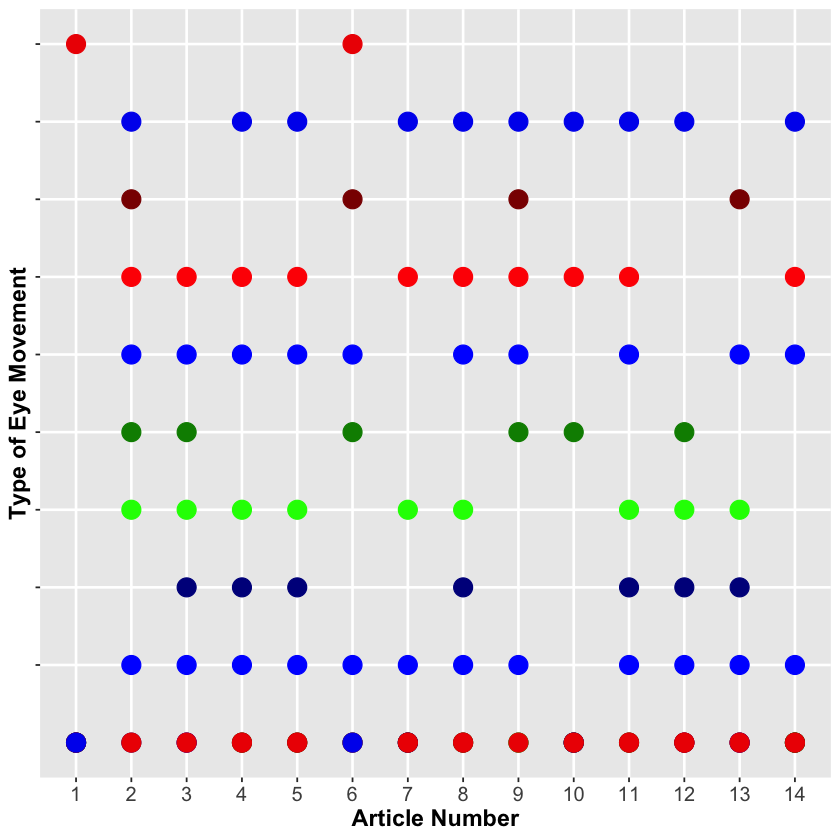

In [3]:
Eye_Move <-read.csv("Eye_1.csv", header=T,na.strings=".") ## Why cant I get the Lgend to work correctly?
#Eye_Move  # test to see if data loaded properly

ggplot(data = Eye_Move) + 
  
  geom_point(mapping = aes(x = ArtNum, y = AOI), color = "blue",size=5) +
  geom_point(mapping = aes(x = ArtNum, y = SacLen), color = "blue4",size=5) +
  geom_point(mapping = aes(x = ArtNum, y = SacNum), color = "green",size=5) +
  geom_point(mapping = aes(x = ArtNum, y = FixSeq), color = "green4",size=5) +
  geom_point(mapping = aes(x = ArtNum, y = FixNum), color = "blue",size=5) +
  geom_point(mapping = aes(x = ArtNum, y = FixDur), color = "red",size=5) +
  geom_point(mapping = aes(x = ArtNum, y = ScanPath), color = "red4",size=5) +
  geom_point(mapping = aes(x = ArtNum, y = Heat), color = "blue2",size=5) +
  geom_point(mapping = aes(x = ArtNum, y = Other), color = "red2",size=5) +
  scale_x_continuous(breaks = seq(1, 15, 1)) +
  scale_y_continuous(breaks = seq(1, 9, 1)) +

  labs(x="Article Number", y="Type of Eye Movement") + 
  theme(panel.grid.minor =   element_blank(),
  panel.grid.major =   element_line(colour = "white",size=0.75)) +
  theme(axis.text=element_text(size=12),
        axis.title=element_text(size=14,face="bold"),
        axis.text.y = element_blank())

## This plot is supposed to be a representation of the type of eye movement parameters that were collected for each of the articles. 
## I had to kinda duct-tape my way around a problem - I wasn't sure how to plot more than 1 y-variable for ever x-variable.
## For example, in article 2, I wanted to plot 1,3,4,5,6,7,and 8, but I wasnt sure how to easily have a 1-to-1 variable correlation.
## I know that in order to make what I want plottable, I would need to turn this 14x10 data frame into a 2x70. Maybe it would be
## a good exercise for me to try this soon, but for now, I just kinda wanted to use this as some more practice with gg plot.

## Another thing that really bugged me was this y=zero row. It doesn't represent anything meaningful and I couldn't 
## remove this data with changing all 0 values to NA without getting a bunch of warnings.


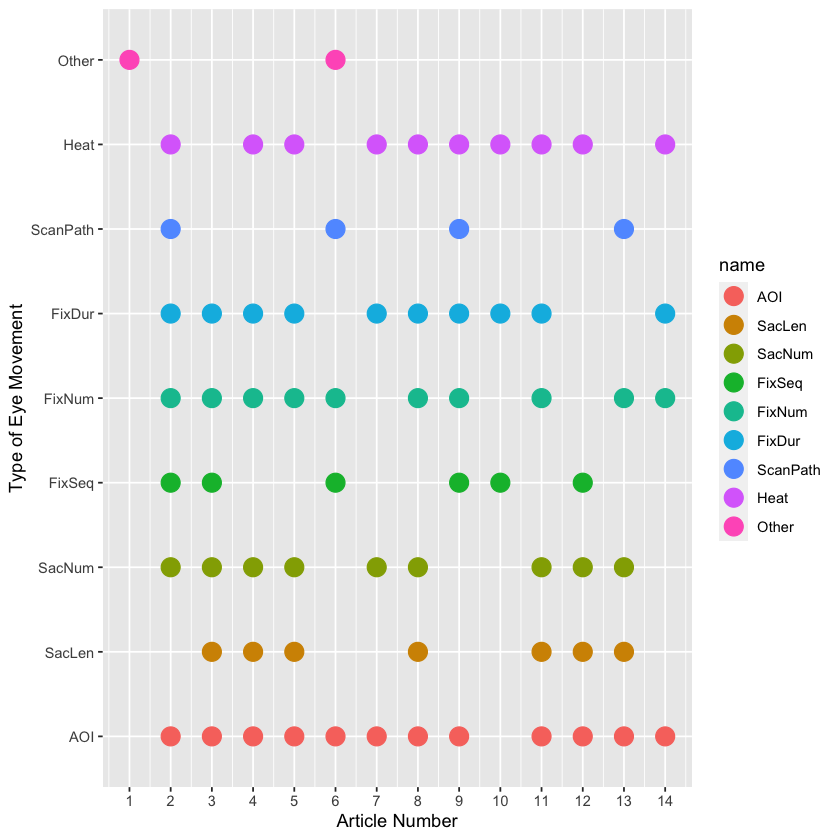

In [11]:
# use pivot_longer to plot all variables in a long format
# use a discrete y scale to see the column names on the y axis (+ color legend)
Eye_Move %>%
    # switch all columns to long format
    pivot_longer(cols = c(-ArtNum)) %>%
    # turn columns into factor to preserve order
    mutate(name = as_factor(name)) %>%
    # disregard those with 0 value
    filter(value > 0) %>%
    ggplot() + aes(x = ArtNum, y = name, color = name) +
    geom_point(size = 5) + 
    scale_x_continuous(breaks = seq(1, 15, 1)) +
    labs(x="Article Number", y="Type of Eye Movement") 

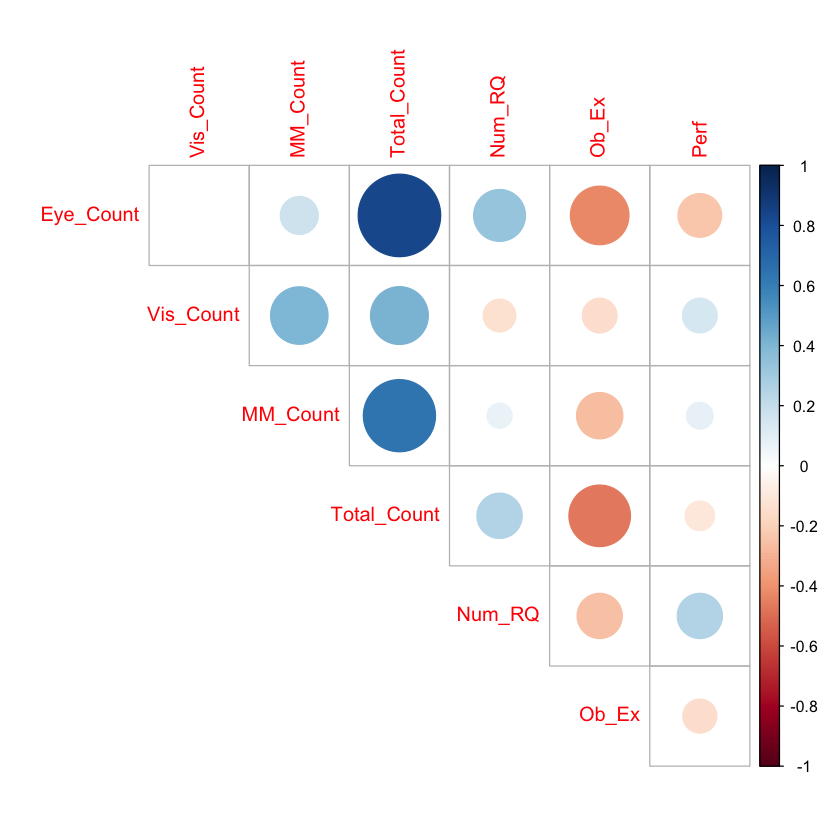

In [13]:
Eye_Move_2 <- read.csv("Eye_2.csv", header=T,na.strings=".")
#Eye_Move_2  # test to see if data loaded properly


EM2 <- cor(Eye_Move_2)
# use diag = FALSE do avoid the confusing 1:1 correlation of the variable with itself
corrplot(EM2, method = "circle",type = "upper", diag = FALSE)

## This corrplot is a really nice tool to be able to see which paramters correlate with each other.

# Second Research Project Applications : Parsing Eye-tracking Data.


Remember, the base paramaters that are collected by the eye-tracking sensors are typically:

* Pupil Diameter
* Focus x-position
* Focus y-position
* Time

From these, we can calculate these secondary parameters:

* Number of Fixations
* Number of Saccades
* Fixation Duration
* Saccade Length
* Scan Path (Order of Fixations)

It is common for the software you use to already calculate all of these secondary parameters, but I thought it might be a good 
excersize for myself to try and manually figure out how to calculate a few of these.


I found a free eye-tracking dataset from Perceptual User Interfaces -https://perceptual.mpi-inf.mpg.de/research/datasets/.

In this dataset, all of the information is in just one colum within the csv file. In one cell, there are 5 pieces of information all separated by a semicolon. 

Here are a few things I'm trying to do to practice getting familiar with manipulating this data in r:

* Separate the one column into multiple columns 
* Count the number of times a gaze has left an AOI  
* Count the number of saccades that occured

I was getting really frustrated with getting a tallier/counter to work, and unfortunately, I still don't have it working :(
Once I get this tallier down, a lot more options open up.

Anyway, here's what I got:

In [36]:
Eye_Move_3 <- read.csv("Eye_3.csv", header=T,na.strings=".")

#length(Eye_Move_3)

#df <- data.frame(x = c(NA, "a?b", "a.d", "b:c"))

# yes tidyr::seperate is awesome
Eye_Move_3 <- separate(Eye_Move_3, Data, c("Pup_x", "Pup_y", "Time","Conf","Pup_d"), sep = ";") ##This is seriously the only line I needed to write to separate out the values? This took me hors :(

# typically you would do this all in one to clarify what's going on
# (+ you need to convert the data to numeric after string splitting since it's still text)
Eye_Move_3 <- 
    # use read_csv instead of read.csv for better defaults
    read_csv("Eye_3.csv", col_types = cols(Data = col_character())) %>%
    # separate by ";" and check convert = TRUE to convert to numeric values
    separate(Data, c("Pup_x", "Pup_y", "Time","Conf","Pup_d"), sep = ";", convert = TRUE)

head(Eye_Move_3)


#str_split_fixed(Eye_Move_3$Data, ";", Inf )
#Eye_Move_3
#class(Eye_Move_3)
#typeof(Eye_Move_3)
#names(Eye_Move_3)
#attributes(Eye_Move_3)
#length(Eye_Move_3)

#names(Eye_Move_3)[1] <- "Pup x"
#names(Eye_Move_3)
#names(Eye_Move_3)[2] <- "Pup y"
#names(Eye_Move_3)[3] <- "Time"
#names(Eye_Move_3)[4] <- "Conf"
#names(Eye_Move_3)[5] <- "Pup d"
#names(Eye_Move_3)
#colnames(Eye_Move_3) <- c("x_pup","y_pup","time","con","pup_d")

#head(Eye_Move_3, n=10L)

##All of this commented out section was me trying to manipulate the names of the columns before figuring out the one line solution.




## Lets say now I'd like to add a new column, which counts the number of saccades that have appeared.
## I know from the Readme file that from left to right, the columns are (x pupil position, y pupil position, timestamp (s), confidence, and pupil diameter)

## Lets say we want to calulate how many times the particpant looked outside of a defined area of interest
## and lets define the areas of interest(AOI) where we split the screen vertically, at x=0.5, and everything on the right half 
## of the screen is outside of the AOI.

Eye_Move_3$Right <- Eye_Move_3[['Pup_x']] >= 0.5 ##This adds a column, which states if pupil position is on the right or left side of screen.
#Eye_Move_3

Eye_Move_3$Right [Eye_Move_3$Right == "true"] <- 1  ##This replaces the boolean value from the above line, and turns it into either a 1 or 0 value.
Eye_Move_3$Right [Eye_Move_3$Right == "false"] <- 0
Eye_Move_3$Right <- as.integer(as.logical(Eye_Move_3$Right))

#Now I'm trying to make a counter, that counts how many times the particpants gaze exited the AOI (left side of the screen)
#i=1
#Eye_Move_3 %>% mutate(Tally = ifelse(Right < lag(Right), i, i+1)) #If the colum "right" goes from 0 to 1, then the particpant went from the left side of the screen to the right. So I'd like to add one to the value in this column.

#for (row in 1:nrow(Eye_Move_3)) {
    #i=0,
    
    #Tally <- i
    #ifelse(Right < lag(Right), i, i+1))
    

#Eye_Move_3 %>% mutate(Tally = ifelse(Right < lag(Right), i, i+1))  

## Eye_Move_3$Distance <- sqrt((Eye_Move_3[['Pup_x']]-lag(Eye_Move_3[['Pup_x']])^2 +(Eye_Move_3[['Pup_y']]-lag(Eye_Move_3[['Pup_y']])^2)

## This is supposed to calulate the distance the eyes have moved, by taking the 
## sqrt(((current x position)-(previous x position))^2 - ((current y position)-(previous y position))^2)

## It was working earlier, but I'm not sure why it just stopped working now that I'm testing it again. I must have tweaked something :(

# you don't need to go through the trouble of converting TRUE and FALSE into integers, they automatically behave that way if you do math with them (TRUE = 1, FALSE = 0)
# and the way to get the number of switches in the "Right" column is with a neat little trick using the difference between successive TRUE/FALSE and a cumulative sum
# the distance calculation should work but I prefer using diff
Eye_Move_3 <- Eye_Move_3 %>%
    mutate(
        # pupil on the right side? TRUE = yes, FALSE = no
        Right = Pup_x >= 0.5,
        # switching from left to right side or right to left, 1 = switch from left to right, -1 = switch from right to left
        Switch = c(0, diff(Right)),
        # count absolute number of switches
        Tally = cumsum(abs(Switch)),
        # calculate movement distance (0 = no movement at the initial data point)
        Distance = c(0, sqrt(diff(Pup_x)^2 + diff(Pup_y)^2))
    )
head(Eye_Move_3)

# now you can do some fun summarizing calucations figureing out time and distance spent in each area upon switchging back and forth
Eye_Move_3_summary <- Eye_Move_3 %>%
    group_by(Tally, Right) %>%
    summarize(
        # calculate total time in area
        total_time = sum(Time),
        # calculate total distance in area
        total_distance = sum(Distance),
        # ungroup again
        .groups = "drop"
    )
head(Eye_Move_3_summary)

# or do the same for total time and distance spent in either area by groupying only with "Right"
Eye_Move_3 %>%
    group_by(Right) %>%
    summarize(
        # calculate total time in area
        total_time = sum(Time),
        # calculate total distance in area
        total_distance = sum(Distance),
        # ungroup again
        .groups = "drop"
    )

Pup_x,Pup_y,Time,Conf,Pup_d
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.325535,0.394603,4970.635,0.400072,85.39287
0.312254,0.385958,4970.668,0.918386,81.39687
0.309798,0.386860,4970.701,1.000000,81.59299
0.308230,0.387162,4970.733,1.000000,82.13656
0.307834,0.386513,4970.766,1.000000,81.98202
0.308370,0.385126,4970.799,1.000000,81.74380


Pup_x,Pup_y,Time,Conf,Pup_d,Right,Switch,Tally,Distance
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>
0.325535,0.394603,4970.635,0.400072,85.39287,FALSE,0,0,0.0000000000
0.312254,0.385958,4970.668,0.918386,81.39687,FALSE,0,0,0.0158467973
0.309798,0.386860,4970.701,1.000000,81.59299,FALSE,0,0,0.0026163983
0.308230,0.387162,4970.733,1.000000,82.13656,FALSE,0,0,0.0015968181
0.307834,0.386513,4970.766,1.000000,81.98202,FALSE,0,0,0.0007602743
0.308370,0.385126,4970.799,1.000000,81.74380,FALSE,0,0,0.0014869650


Tally,Right,total_time,total_distance
<dbl>,<lgl>,<dbl>,<dbl>
0,FALSE,890298.269,5.8693581
1,TRUE,34838.075,0.2437012
2,FALSE,4977.018,0.7239968
3,TRUE,9954.135,0.7748259
4,FALSE,4977.117,0.7508942
5,TRUE,59727.971,0.8426707


Right,total_time,total_distance
<lgl>,<dbl>,<dbl>
FALSE,4309285,76.951866
TRUE,673402,9.668502
